In [50]:
import sys
sys.path.append('../')

from loaders import pvc4

loader = pvc4.PVC4('../data/crcns-pvc4', 
                   nt=32, 
                   nx=64,
                   ny=64,
                   split='train',
                   )

In [51]:
import collections
segments_per = collections.defaultdict(int)
repeats_per = collections.defaultdict(int)
for tgt in loader.sequence:
    segments_per[tgt['cellnum']] += 1

In [52]:
segments_per

defaultdict(int,
            {0: 234,
             1: 482,
             2: 786,
             3: 403,
             4: 403,
             5: 423,
             6: 151,
             7: 117,
             8: 336,
             9: 635,
             10: 403,
             11: 468,
             12: 585,
             13: 336,
             14: 501,
             15: 106,
             16: 468,
             17: 208,
             18: 151,
             19: 151,
             20: 151,
             21: 151,
             22: 140,
             23: 289,
             24: 151})

In [55]:
import tables

f = tables.open_file('/mnt/d/Downloads/ct0006_arg0466d_128.mat', 'r')
f.list_nodes('/')

TypeError: list_nodes() missing 1 required positional argument: 'where'

In [57]:
22000/85

258.8235294117647

In [56]:
f.list_nodes('/rawStims')

/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/tables/attributeset.py:308: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'ranges'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


[/cellid (Array(5, 1)) ''
   atom := UInt16Atom(shape=(), dflt=0)
   maindim := 0
   flavor := 'numpy'
   byteorder := 'little'
   chunkshape := None,
 /psths (EArray(1, 22000), zlib(3)) ''
   atom := Float32Atom(shape=(), dflt=0.0)
   maindim := 0
   flavor := 'numpy'
   byteorder := 'little'
   chunkshape := (1, 11000),
 /ranges (Group) ''
   children := ['crange' (EArray), 'nrange' (Array), 'trange' (Array), 'vrange' (CArray)],
 /rawStims (EArray(22000, 128, 128), zlib(3)) ''
   atom := UInt8Atom(shape=(), dflt=0)
   maindim := 0
   flavor := 'numpy'
   byteorder := 'irrelevant'
   chunkshape := (4, 128, 128)]

In [98]:
22000/85

258.8235294117647

In [59]:
X = f.get_node('/rawStims')[:]

In [97]:
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

def get_anim(result, norm=False):
    fig = plt.figure(figsize=(4, 4))
    ax = plt.gca()
    im = plt.imshow([[0]], cmap='gray')
    plt.axis('off')
    nt = result.shape[2]

    def drawframe(n):
        if n >= nt:
            n = nt - 1
        else:
            im.set_data(result[:, :, n])
        if norm:
            im.set_clim(rg)
        return (im)

    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, drawframe, frames=nt*2, interval=100, blit=False)
    plt.close()
    return anim

#anim = get_anim(data['wconv'][:, :, :, 1], norm=True).to_html5_video()
#HTML(anim)

HTML(get_anim(X[:10, :, :].transpose((1, 2, 0)), norm=False).to_html5_video())

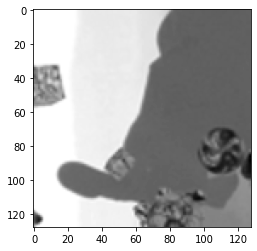

In [95]:
plt.imshow(X[101, :, :], cmap='gray')

In [76]:
X[:100, :, :].transpose((1, 2, 0)).shape

(128, 128, 100)

In [70]:
X.dtype

dtype('uint8')

In [10]:
import tables

h5f = tables.open_file('../data/crcns-ringach-data/derived/movies.h5', 'r')


In [14]:
len(h5f.get_node('/movie000_000'))

924

In [22]:
(len(loader) * 32) / 30 / 250

1231.8378666666667

In [35]:
import collections
segments_per = collections.defaultdict(int)
repeats_per = collections.defaultdict(int)
for tgt in loader.sequence:
    segments_per[tgt['abs_electrode_num']] += 1
    mat_file = loader.mat_files[tgt['key']]
    batch = mat_file['pepANA']['listOfResults'][tgt['result']]
    repeats_per[tgt['abs_electrode_num']] += (batch['noRepeats'])

In [36]:
repeats_per

defaultdict(int,
            {0: 2677,
             1: 2677,
             2: 2677,
             3: 2677,
             4: 2677,
             5: 2677,
             6: 2677,
             7: 2677,
             8: 2677,
             9: 2677,
             10: 2677,
             11: 2677,
             12: 2677,
             13: 2677,
             14: 2677,
             15: 2677,
             16: 2677,
             17: 2677,
             18: 2677,
             19: 2677,
             20: 2677,
             21: 2677,
             22: 2677,
             23: 2677,
             24: 2677,
             25: 2677,
             26: 2677,
             27: 2677,
             28: 2677,
             29: 2677,
             30: 2677,
             31: 2677,
             32: 2677,
             33: 2677,
             34: 2677,
             35: 2677,
             36: 2677,
             37: 2677,
             38: 2677,
             39: 2677,
             40: 2677,
             41: 2677,
             42: 2677,
    

In [31]:
2677*32/30

2855.4666666666667

segments_per

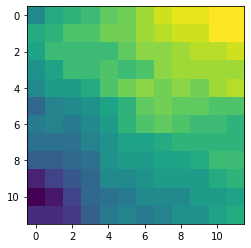

In [20]:
import matplotlib.pyplot as plt

data['mov'].shape
plt.imshow(data['mov'][:, :, 0])

In [37]:
from loaders import utils

dataset = 'data/crcns-pvc4/Nat/r0211A/r0211A_summary_file.mat'
#data = scipy.io.loadmat(dataset)
utils.load_mat_as_dict(dataset)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Jan 31 15:33:41 2008',
 '__version__': '1.0',
 '__globals__': [],
 'celldata': {'id': [866, 867, 869, 868],
  'cellid': ['r0211A', 'r0211A', 'r0211A', 'r0211A'],
  'masterid': [105, 105, 105, 105],
  'rawid': [363, 364, 366, 365],
  'celldataid': [356, 357, 359, 358],
  'runclassid': [0, 0, 0, 0],
  'path': ['/auto/k5/david/data/R211A/',
   '/auto/k5/david/data/R211A/',
   '/auto/k5/david/data/R211A/',
   '/auto/k5/david/data/R211A/'],
  'resplen': [3475, 3475, 707, 3475],
  'repcount': [1, 1, 20, 1],
  'respfile': ['R211A.review.andros.24_pix.50sec.1.all.d-.psth.neg_flag',
   'R211A.review.clown.24_pix.50sec.1.all.d-.psth.neg_flag',
   'R211A.review.patamonks.24_pix.10sec.1.all.d-.psth.neg_flag',
   'R211A.review.patamonks.24_pix.50sec.1.all.d-.psth.neg_flag'],
  'respvarname': ['R211A', 'R211A', 'R211A', 'R211A'],
  'respfiletype': [1, 1, 1, 1],
  'nosync': [0, 0, 0, 0],
  'respfilefmt': ['14ms PSTH', '14ms PSTH'

In [1]:
from loaders import pvc4
data = pvc4._loadimfile(
            'data/crcns-pvc4/Nat/r0208D/test.review.mountlake.30_pix.2sizes.imsm')

44.67577160493827

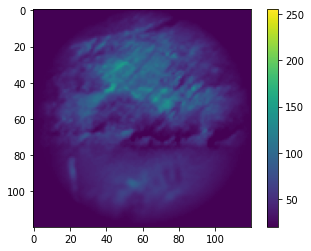

In [36]:
import matplotlib.pyplot as plt
plt.imshow(data[0, ::-1, :], clim=[20, 255])
plt.colorbar()

data.mean()